 # <center> MITgcm Channel </center> #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline


In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

# <center> Flat Bottom  </center> #

In [3]:
tau = ['50', '250', '1000', '2000']
#tau = ['50', '250', '500' , '1000', '2000']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Vary_N/'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'m/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

## $ROC_{iso} (y,z)$ ##

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


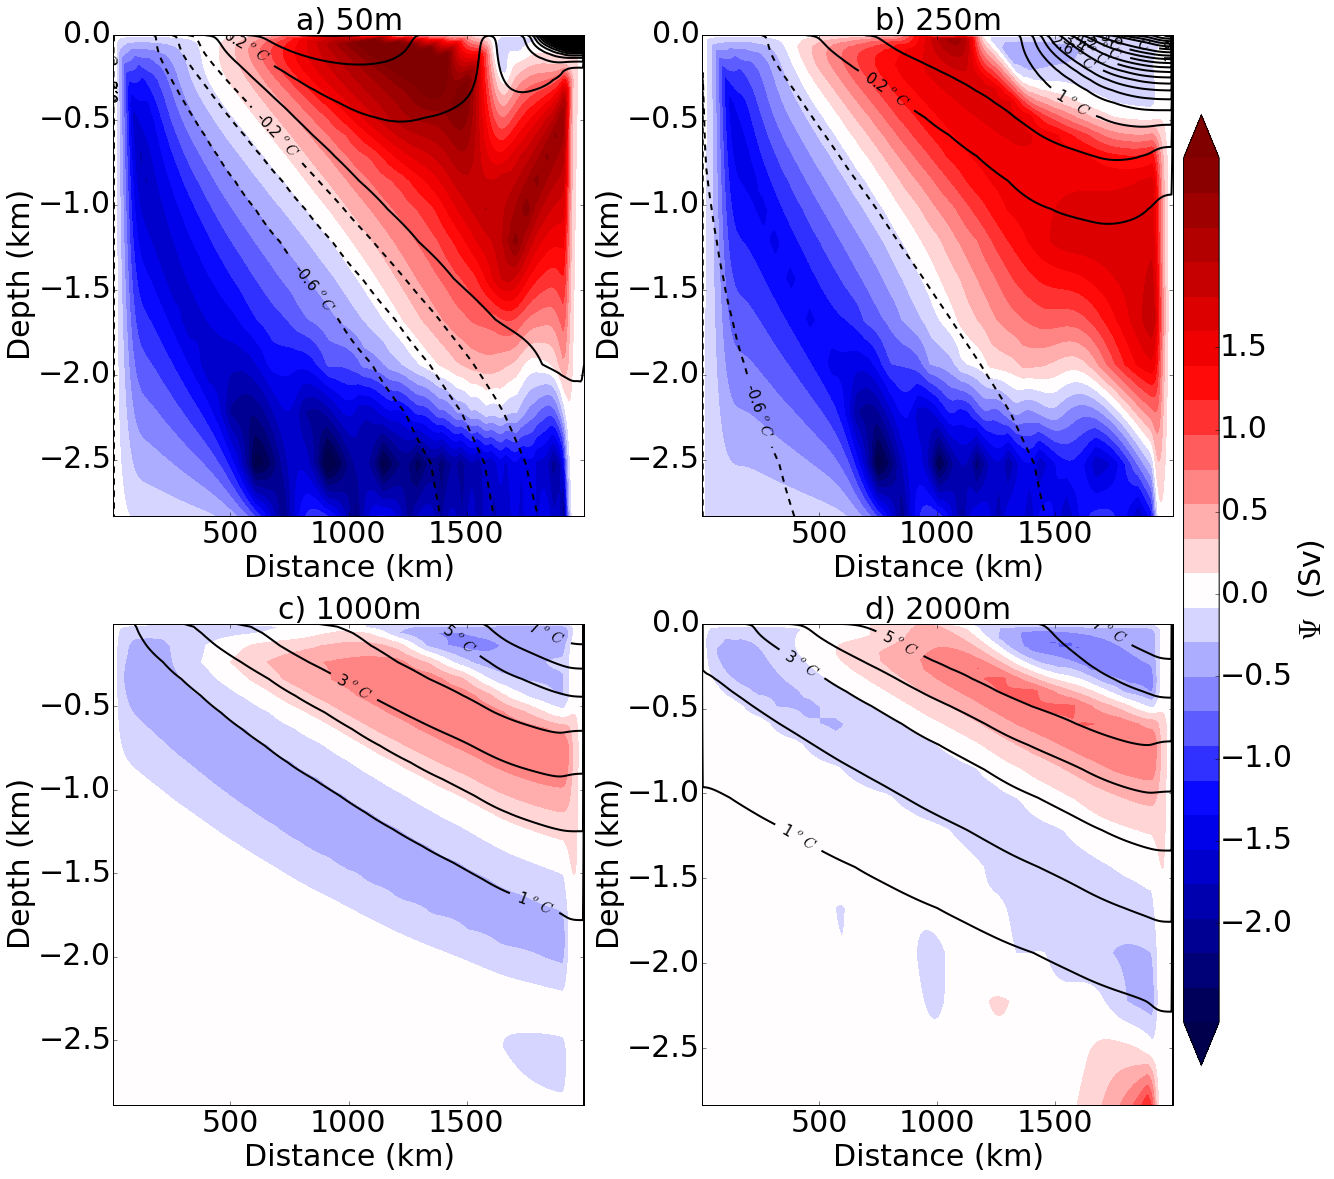

In [4]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2.6, 2.7, .21)
Psi_ticks =np.arange(-2., 2., .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Q_levs = np.arange(-0.6,8,0.2),np.arange(-0.6,8,0.4),arange(-1,8,1),arange(-1,8,1),arange(-1,8,1)
for i in range(len(Runs)):
    #i =2 
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    c.load_grid()
    Psi = c.get_psi_iso_z()/10**6
    ax = fig.add_subplot(2, 2, i+1)
    
    p = ax.contourf(c.yc/1000, c.zc/1000,
                Psi, Psi_levs, cmap=plt.cm.seismic, extend='both')
    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs[i], colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

## MOC (y,z) ##

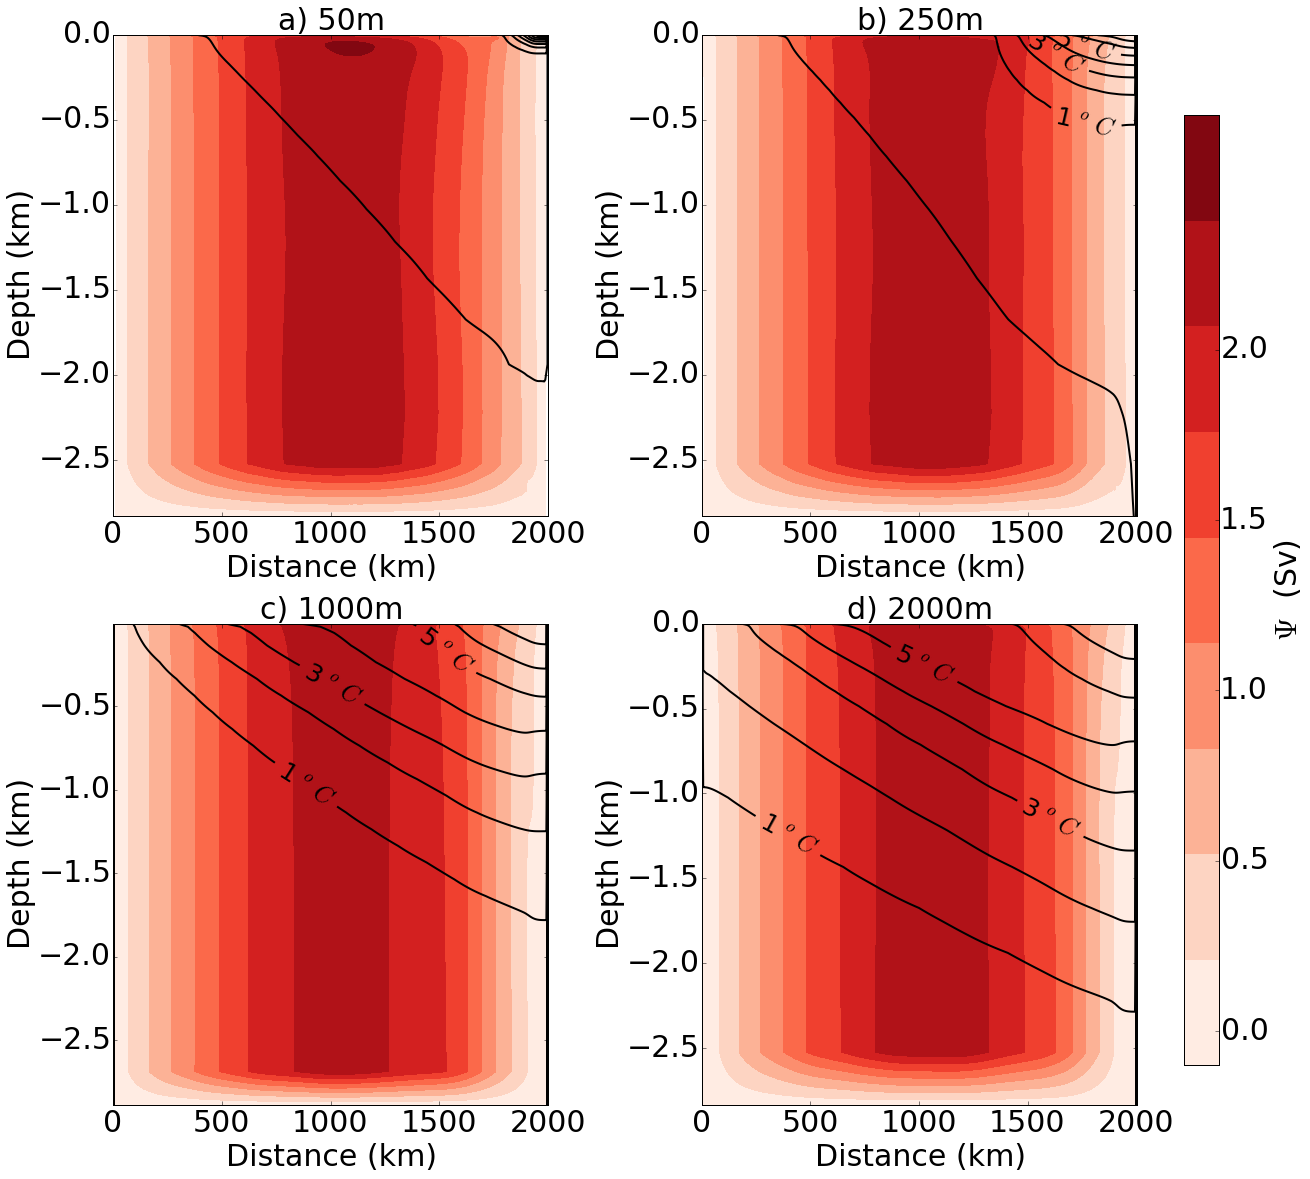

In [5]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0.1, 2.7, .31)
Psi_ticks =np.arange(0, 2.5, .5)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    c.load_grid()
    Psi = c.get_psi_bar()/10**6
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yg/1000, c.zc/1000,
                Psi, Psi_levs, cmap=plt.cm.Reds)

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

### A few extra plots... ####

In [16]:
np.min(c.get_zonal_avg('Tav.nc','THETA'))

-0.86283708

In [44]:
T1 = np.min(c.get_zonal_avg('Tav.nc','THETA')) - 0.1
T2 = np.max(c.get_zonal_avg('Tav.nc','THETA')) + 0.2
Tm = np.mean(c.get_zonal_avg('Tav.nc','THETA'))

In [45]:
np.round(np.linspace(np.round(T1,2), np.round(Tm+abs(Tm-T1),2),32),2)


array([-0.33, -0.21, -0.09,  0.03,  0.14,  0.26,  0.38,  0.5 ,  0.62,
        0.74,  0.86,  0.98,  1.09,  1.21,  1.33,  1.45,  1.57,  1.69,
        1.81,  1.93,  2.04,  2.16,  2.28,  2.4 ,  2.52,  2.64,  2.76,
        2.88,  2.99,  3.11,  3.23,  3.35])

In [46]:
np.round(np.linspace(np.round(Tm+abs(Tm-T1),2),T2,11),2)

array([ 3.35,  3.83,  4.31,  4.8 ,  5.28,  5.76,  6.24,  6.73,  7.21,
        7.69,  8.17])

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide


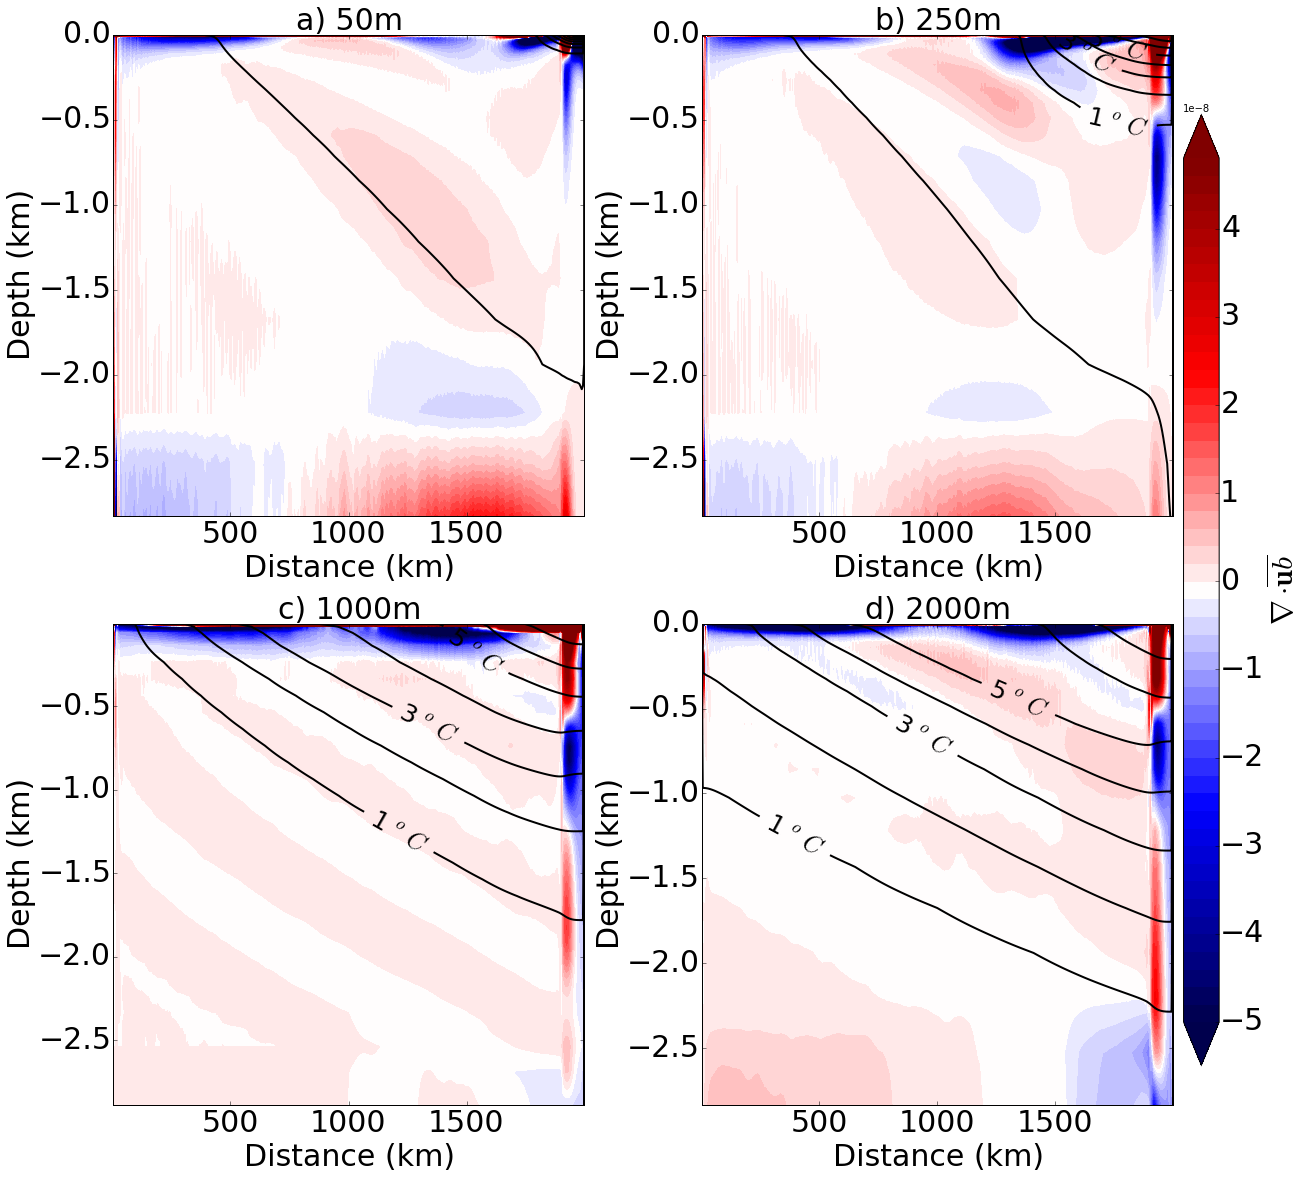

In [6]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-5,5,0.2))*10**-8
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
               (c.ddy_cgrid_centered(VT.mean(axis=2)) + c.ddz_cgrid_centered(WT.mean(axis=2))) , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$\nabla \cdot \overline{\mathbf{u} b}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide


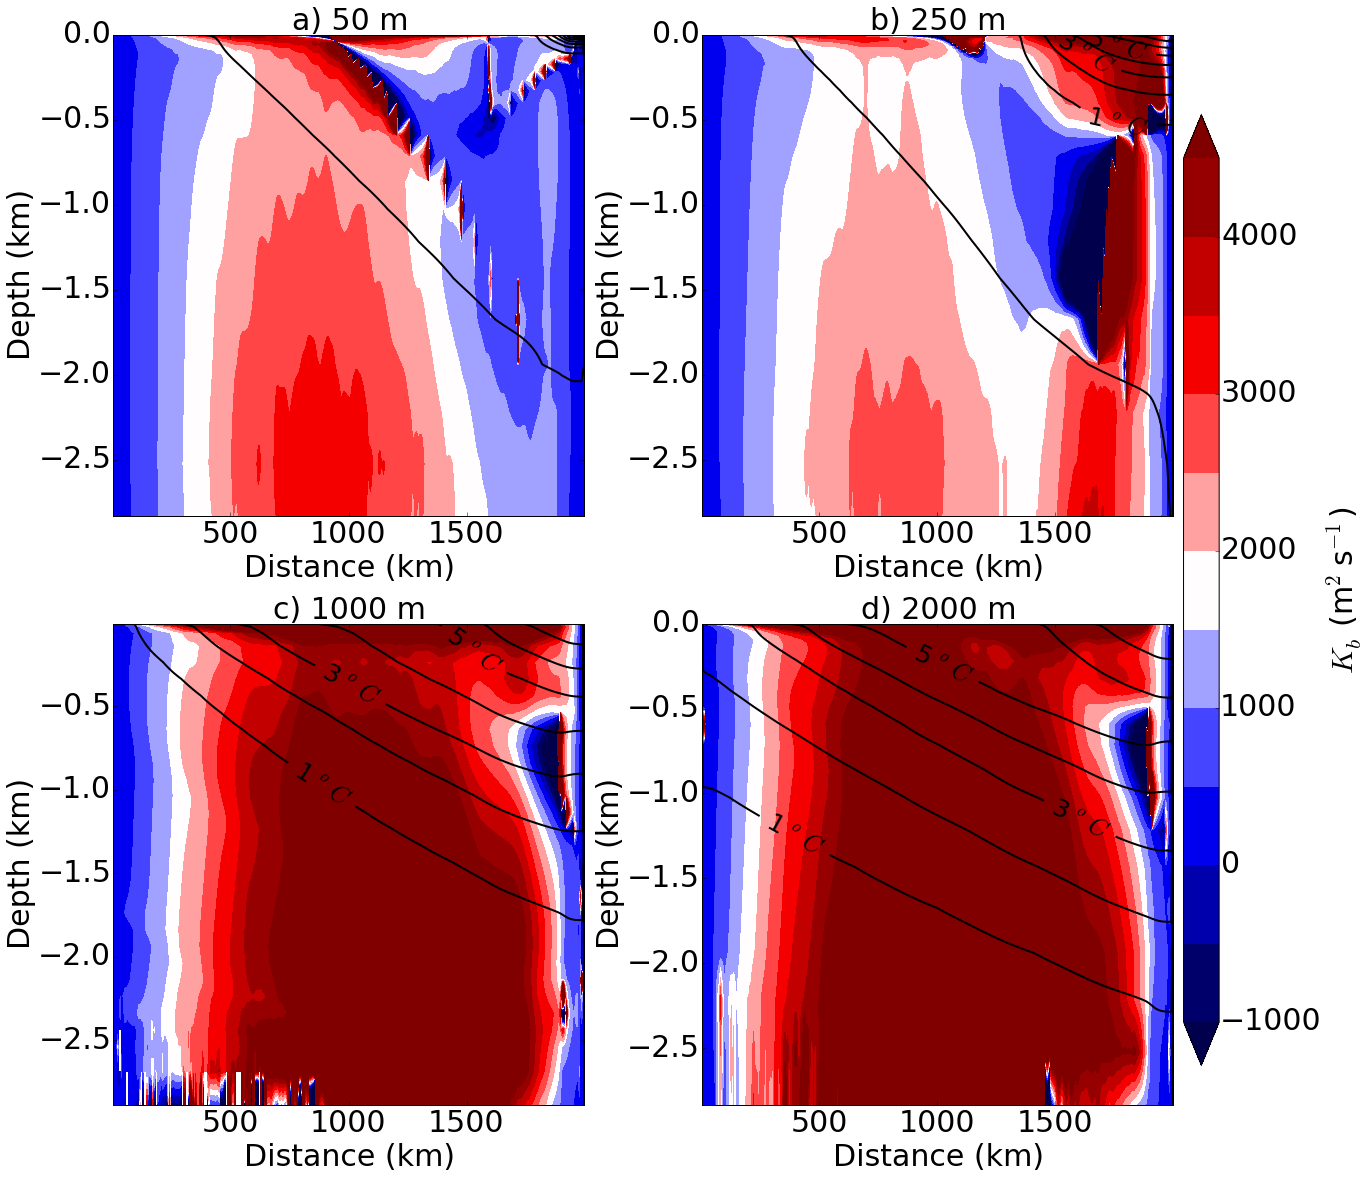

In [6]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-1000,5000,500))
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000, Kb , Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in divide


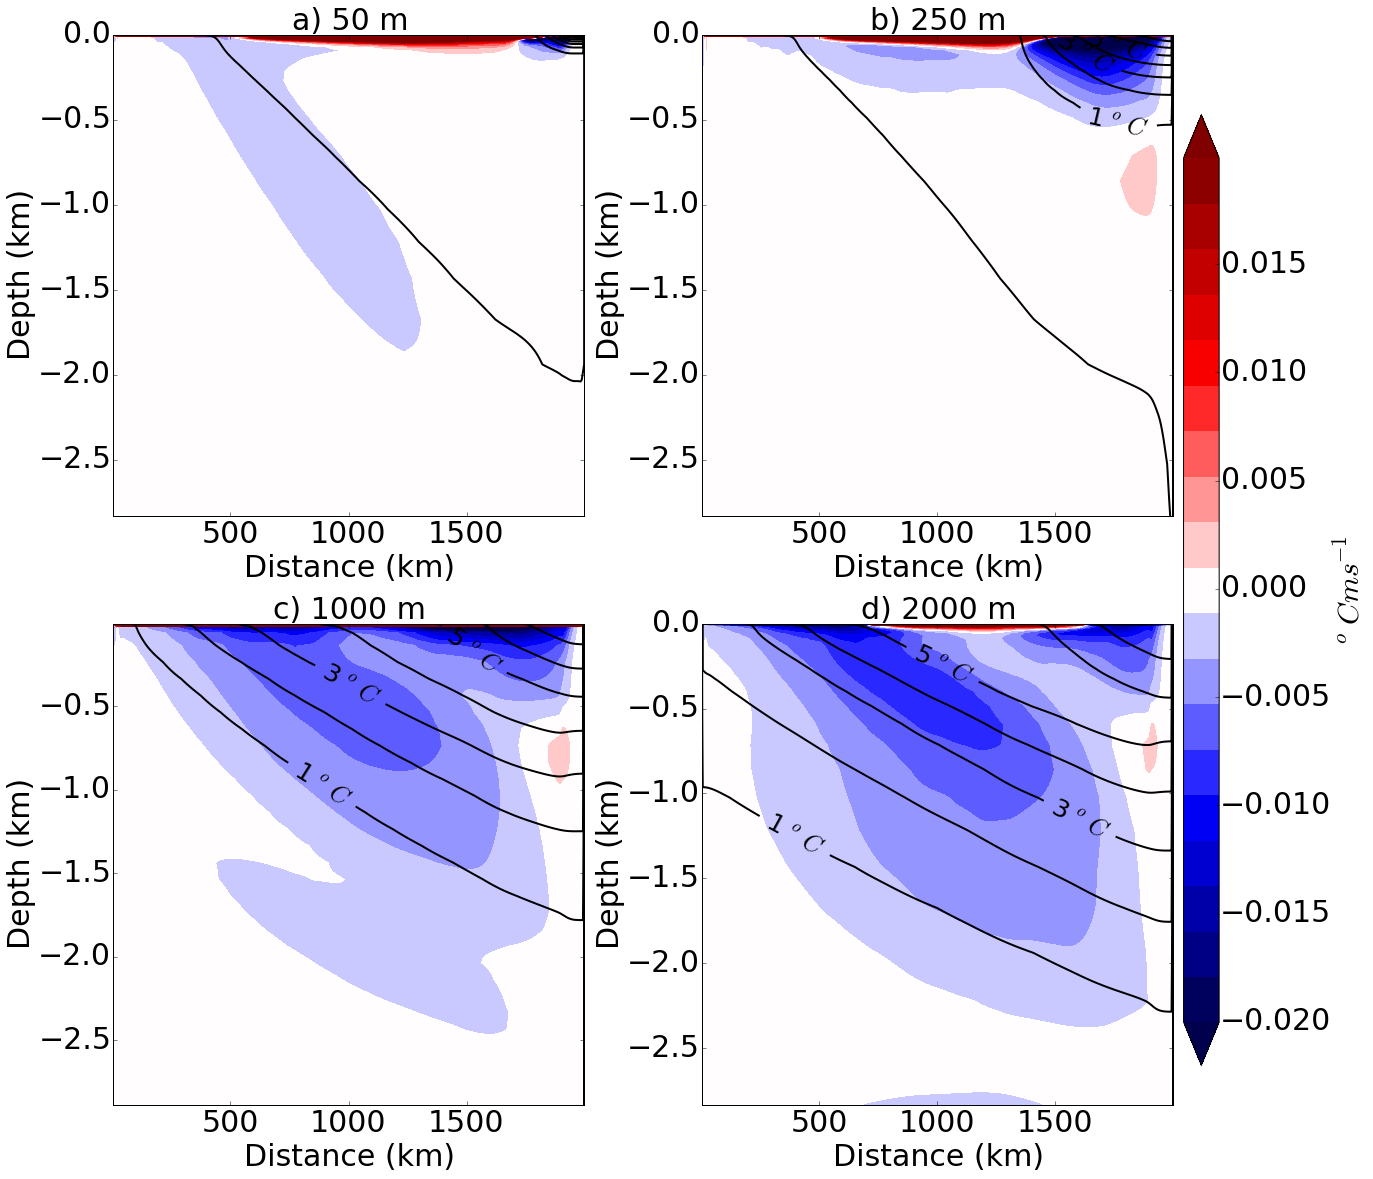

In [7]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-.02,0.022,0.0021))
Q_ticks = np.arange(-.2, 0.2, .05)/10
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.get_theta(N=int(tau[i]))
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = VpTp 
    bfac = 9.8*2e-4

    #title(r'$K_b$ (m$^2$s$^{-1}$)', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000, Kb , Q_levs, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Q_ticks)
cbar.ax.set_ylabel(r'$^o C m s^{-1}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: RuntimeWarning: divide by zero encountered in divide


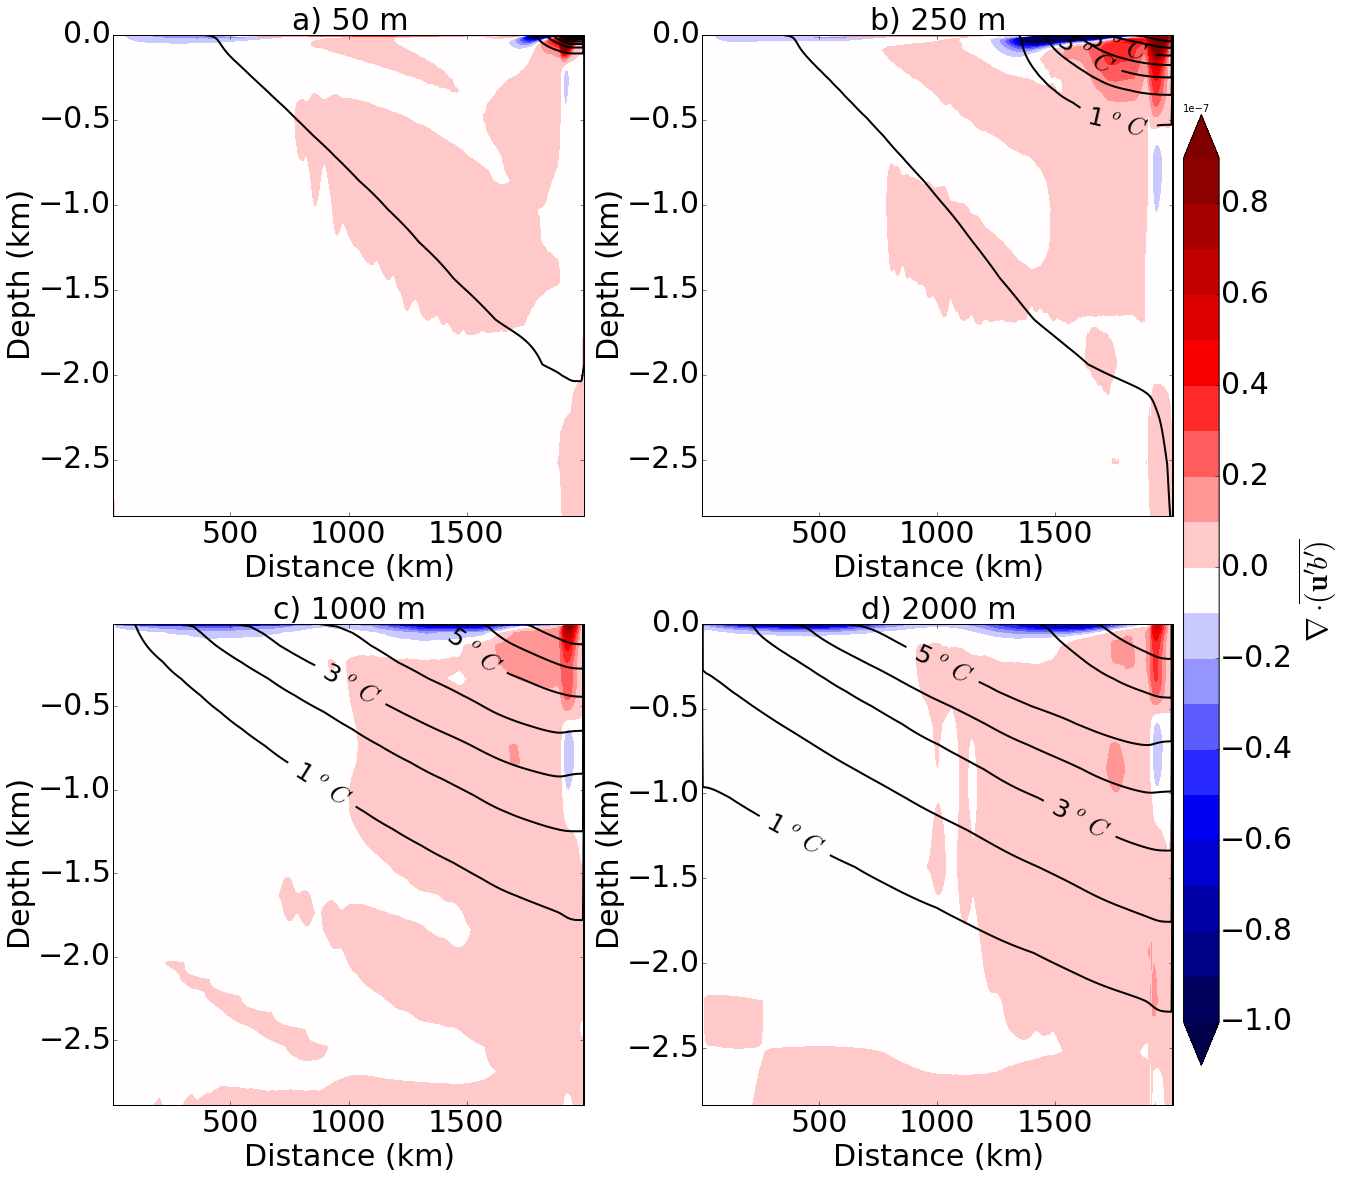

In [11]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-3., 3., .21)
Psi_ticks =np.arange(-3., 3., .5)
Q_levs = (arange(-1,1,0.1))*10**-7
Q_ticks = np.arange(-10., 10., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar                                                                                                                    
    # put everything on the C Grid                                                                                                        
    T = c.mnc('Tav.nc','THETA')
    V = c.vgrid_to_cgrid(c.mnc('Tav.nc','VVEL'))
    W = c.wgrid_to_cgrid(c.mnc('Tav.nc','WVEL'))
    VT= c.vgrid_to_cgrid(c.mnc('Tav_VT.nc','VVELTH'))
    WT= c.wgrid_to_cgrid(c.mnc('Tav_VT.nc','WVELTH'))

    VpTp = ( (VT) - V*T ).mean(axis=2)
    WpTp = ( (WT) - W*T ).mean(axis=2)
    
    
    # mean zonal flow                                                                                                                     
    Ubar = c.mnc('Tav.nc','UVEL').mean(axis=2)
    Ubc = Ubar - tile(Ubar[-1,:],(Nz,1))
    Tbar = T.mean(axis=2)
    Ty = c.ddy_cgrid_centered(Tbar)
    Tz = c.ddz_cgrid_centered(Tbar)
    S = - Ty / Tz

    Kb = - VpTp / Ty
    bfac = 9.8*2e-4

    #title(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$)", fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,   (c.ddy_cgrid_centered(VpTp) + c.ddz_cgrid_centered(WpTp)), Q_levs,cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r"$\nabla \cdot \overline{(\mathbf{u}' b')}$", fontsize=30, )
cbar.ax.tick_params(labelsize=30)

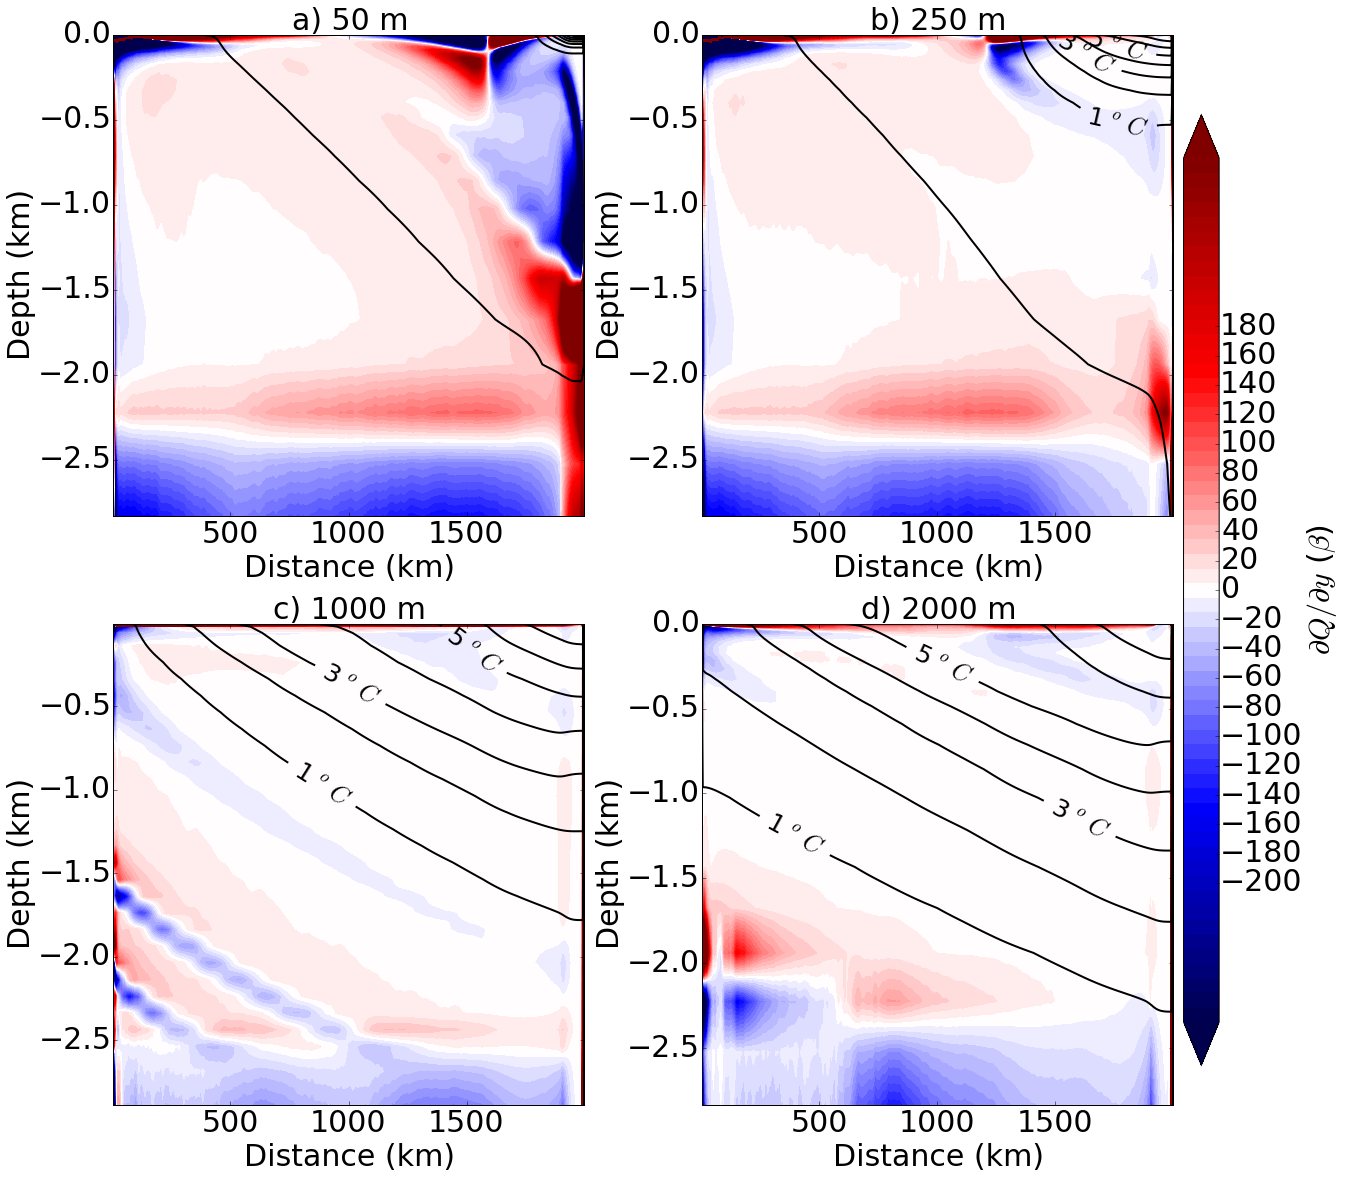

In [10]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-2., 2., .21)
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = (arange(-30,30)+0.5)
Q_ticks = np.arange(-20., 20., 2.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    #title(r'$\partial Q / \partial y$ ($\beta$) - ', fontsize=30 )
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                c.get_qgpv_grad()/c.beta, Q_levs*10, cmap=plt.cm.seismic, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Q_ticks*10)
cbar.ax.set_ylabel(r'$\partial Q / \partial y$ ($\beta$)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

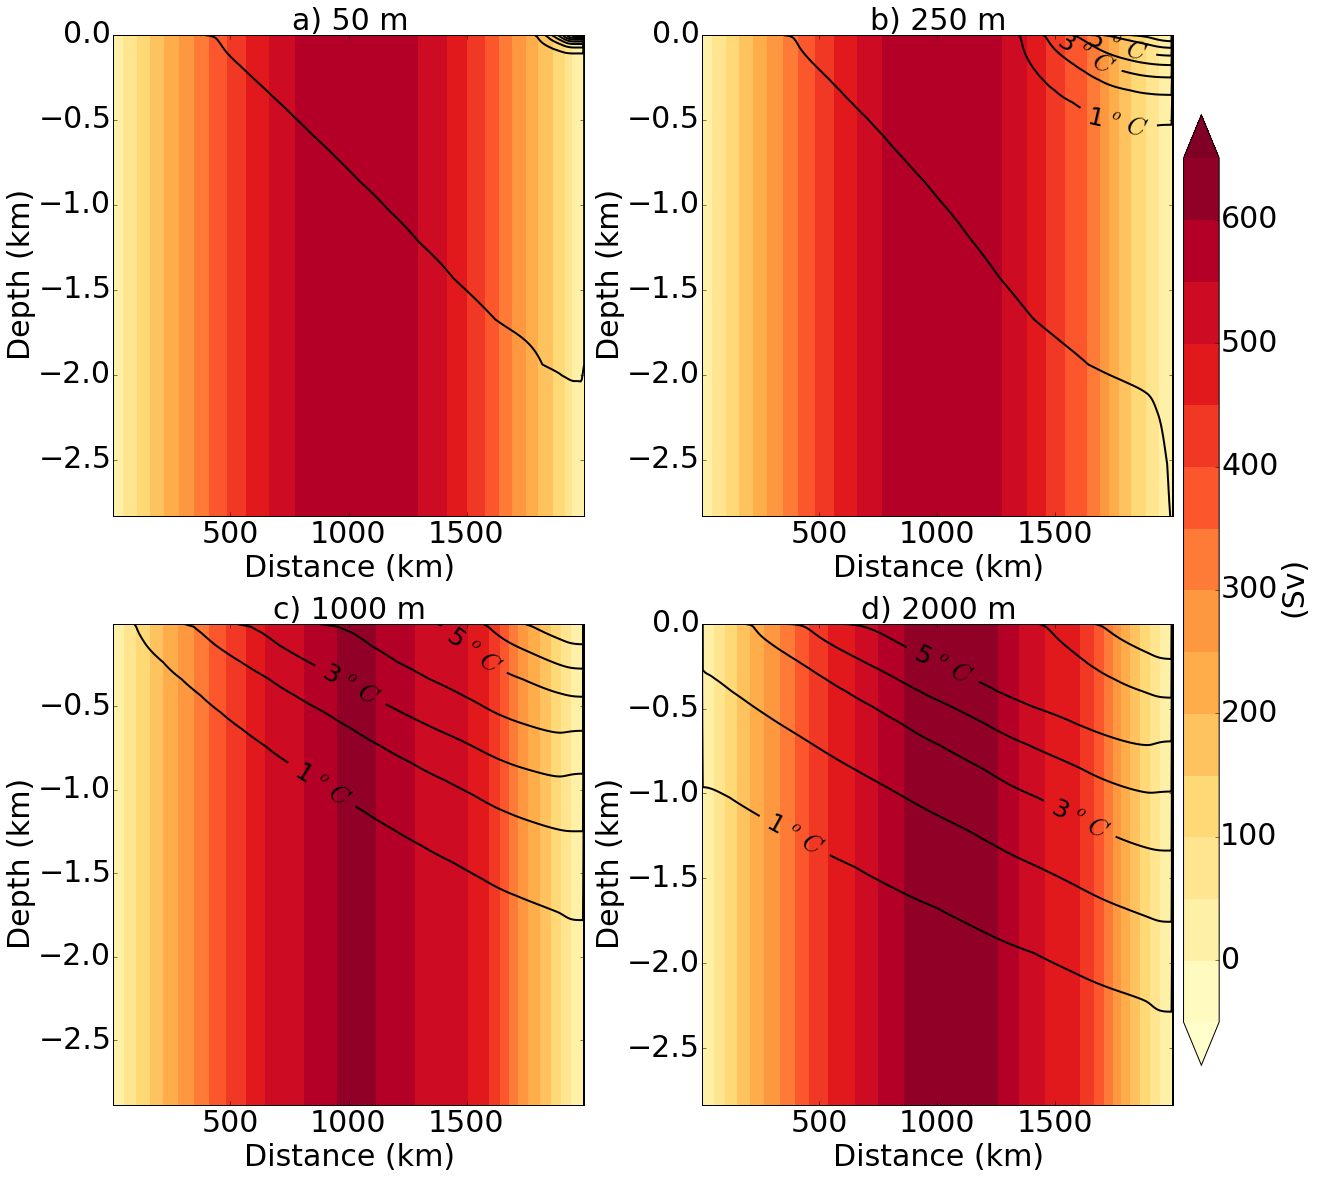

In [8]:
fig = plt.figure(figsize=(16.5, 16.5))
# Create Panels
Psi_levs = np.arange(-50, 700, 50)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    U = c.mnc('Tav.nc','UVEL')
    Depthav =  c.depth_integrate(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(2,2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              BarotropicU.mean(axis=2)*c.Lx/10**6 , Psi_levs, cmap=cm.YlOrRd, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'(Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

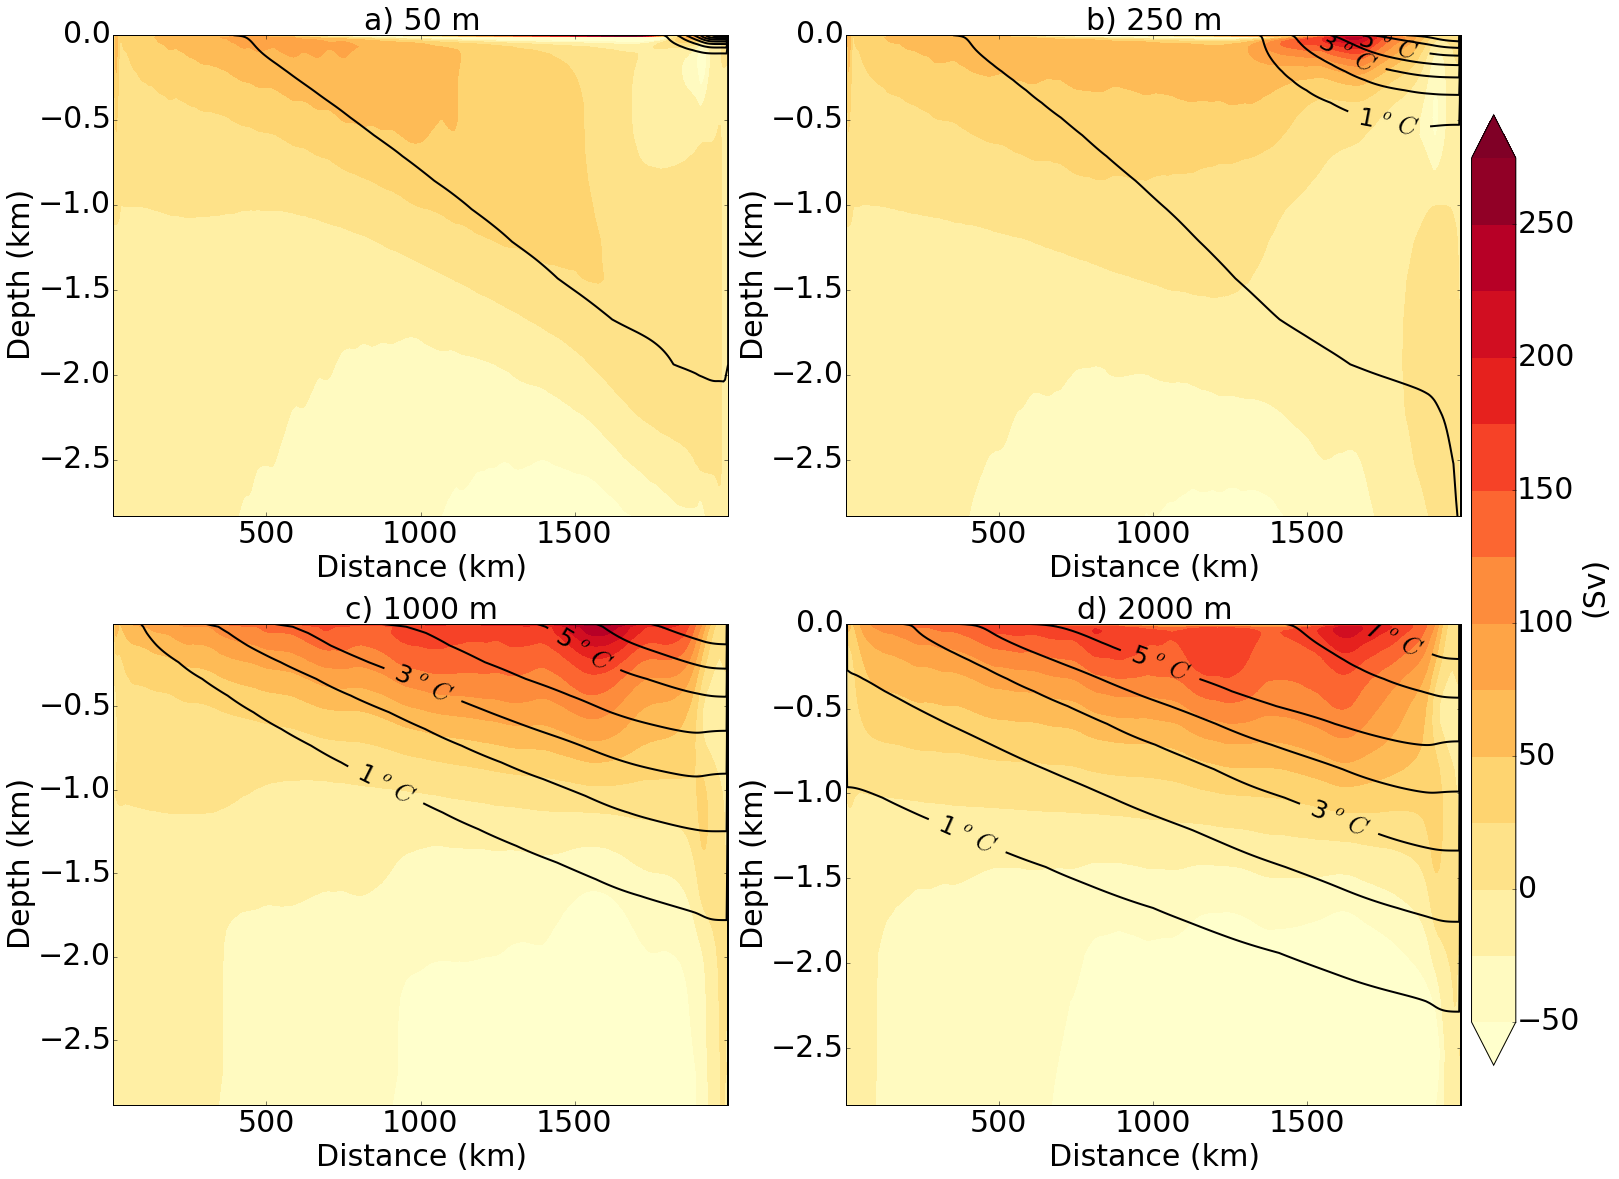

In [9]:
fig = plt.figure(figsize=(20.5, 16.5))
# Create Panels
Psi_levs = np.arange(-50, 300, 25)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    U = c.mnc('Tav.nc','UVEL')
    Depthav =  c.depth_integrate(c.ugrid_to_cgrid(c.mnc('Tav.nc','UVEL')))/c.H
    BarotropicU = tile(Depthav,(c.Nz,1,1))
    baroclinic = (c.ugrid_to_cgrid(U*c.HFacW)-BarotropicU)
    dint = baroclinic*c.H
    #Ubar[lmsk==0] = np.nan
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
              dint.mean(axis=2)*c.Lx/10**6, Psi_levs, cmap=cm.YlOrRd, extend='both')

    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' m', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'(Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)